In [1]:
import tensorflow as tf
import pandas as pd
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#dataset1 (Exclude Obd_Cbn_Cls_Cd)
#read data from preprocessing
data = pd.read_csv('data_test.csv')

#save y min & max
normal_y = data['Bag_Wt_Msr']
y_min =  normal_y.min()
y_max = normal_y.max() 

#normalize
normalize = data[['Bag_Wt_Msr', 'Adult F', 'Adult M', 'Child F', 'Child M', 'Infant F', 'Infant M']]
data_normalize = data
data_normalize[['Bag_Wt_Msr', 'Adult F', 'Adult M', 'Child F', 'Child M', 'Infant F', 'Infant M']] = (normalize - normalize.min()) / (normalize.max() - normalize.min())
tmp = data_normalize.pop('Bag_Wt_Msr')
data_normalize['Bag_Wt_Msr'] = tmp

#split data
x, y = data_normalize.iloc[:, 1:-1], data_normalize.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [8]:
x_train

,Dep_Season,Acft_Typ_Cd,Adult F,Adult M,Child F,Child M,Infant F,Infant M,Dep_Apt_Cd,Arr_Apt_Cd
2979,1,0,0.397849,0.277193,0.000000,0.065217,0.000000,0.142857,11,0
2033,0,0,0.435484,0.375439,0.227273,0.195652,0.142857,0.142857,0,5
2215,0,0,0.569892,0.259649,0.250000,0.391304,0.142857,0.142857,3,0
2840,1,1,0.198925,0.368421,0.000000,0.000000,0.000000,0.000000,0,2
446,0,1,0.376344,0.207018,0.159091,0.260870,0.142857,0.000000,0,3
...,...,...,...,...,...,...,...,...,...,...
4931,1,0,0.731183,0.470175,0.204545,0.260870,0.142857,0.428571,0,1
3264,1,0,0.720430,0.421053,0.227273,0.086957,0.142857,0.000000,11,0
1653,0,1,0.252688,0.084211,0.136364,0.130435,0.000000,0.000000,0,3
2607,0,0,0.440860,0.280702,0.113636,0.152174,0.000000,0.142857,3,0


In [3]:
#dataset2 (Include Obd_Cbn_Cls_Cd)
#read data from preprocessing
data_2 = pd.read_csv('data_test_Cabin.csv')

#save y min & max
normal_y_2 = data_2['Bag_Wt_Msr']
y_min_2 =  normal_y_2.min()
y_max_2 = normal_y_2.max() 

#normalize
normalize_2 = data_2[['Bag_Wt_Msr',  'Adult F C',
       'Adult F K', 'Adult F Y', 'Adult M C', 'Adult M K', 'Adult M Y',
       'Child F C', 'Child F K', 'Child F Y', 'Child M C', 'Child M K',
       'Child M Y', 'Infant F C', 'Infant F K', 'Infant F Y', 'Infant M C',
       'Infant M K', 'Infant M Y']]
data_normalize_2 = data_2
data_normalize_2[['Bag_Wt_Msr',  'Adult F C',
       'Adult F K', 'Adult F Y', 'Adult M C', 'Adult M K', 'Adult M Y',
       'Child F C', 'Child F K', 'Child F Y', 'Child M C', 'Child M K',
       'Child M Y', 'Infant F C', 'Infant F K', 'Infant F Y', 'Infant M C',
       'Infant M K', 'Infant M Y']] = (normalize_2 - normalize_2.min()) / (normalize_2.max() - normalize_2.min())
tmp = data_normalize_2.pop('Bag_Wt_Msr')
data_normalize_2['Bag_Wt_Msr'] = tmp

# split data
x_2, y_2 = data_normalize_2.iloc[:, 1:-1], data_normalize_2.iloc[:, -1]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
def Base_model (act, opt, lr):
    #training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation = act),
        tf.keras.layers.Dropout(0.2), #dropout每次訓練會丟掉100個input的其中20個，矯正過度擬合的現象
        tf.keras.layers.Dense(10)
    ])
    
    #mse均方誤差、mae平均絕對誤差、rmse均方根誤差
    model.compile(optimizer = opt(learning_rate = lr),
                  loss = tf.keras.metrics.mean_squared_error,
                  metrics = 'mae')
    
    start = time.time()
    history = model.fit(x_train.values, y_train.values, validation_split = 0.3, epochs = 150, batch_size = 16, verbose = 0)
    #history = model.fit(x_train_2.values, y_train_2.values, validation_split = 0.33, epochs = 150, batch_size = 20, verbose = 0)
    preds = model.predict(x_test)
    #preds = model.predict(x_test_2)
    loss_keys = list(history.history.keys())
    print("Time:", time.time() - start)
    
    model.summary()
    
    #plot
    for i in range(0, 2):
        plt.subplot(1, 2, i + 1)
        plt.xlabel('Epoch')
        plt.ylabel(loss_keys[i])
        plt.plot(history.history[loss_keys[i]])
        plt.plot(history.history[loss_keys[i + 2]])
        
    plt.subplots_adjust(left = 0.01, bottom = 0.01, right = 0.95, top = 0.5, wspace = 0.5, hspace = 0.4)
    plt.legend(['train', 'test'], loc = 'upper right')
    plt.show()
    
    #損失函數
    model.evaluate(x_test, y_test)
    #model.evaluate(x_test_2, y_test_2)
    
    #clean session
    tf.keras.backend.clear_session()

Time: 40.67388725280762
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


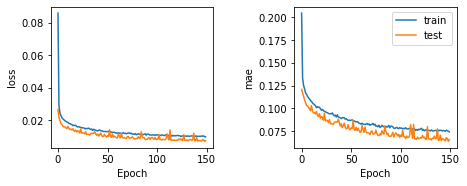

17/17 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0661


In [21]:
#Activation relu
Base_model('relu', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation tanh
Base_model('tanh', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation softmax
Base_model('softmax', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation sigmoid
Base_model('sigmoid', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation softsign
Base_model('softsign', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation hard_sigmoid
Base_model('hard_sigmoid', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation selu
Base_model('selu', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Activation elu
Base_model('elu', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Optimizer SGD
Base_model('relu', tf.keras.optimizers.SGD, 0.01)
Base_model('relu', tf.keras.optimizers.SGD, 0.05)

In [ ]:
#Optimizer RMSprop
Base_model('relu', tf.keras.optimizers.RMSprop, 0.01)
Base_model('relu', tf.keras.optimizers.RMSprop, 0.05)

In [ ]:
#Optimizer Adadelta
Base_model('relu', tf.keras.optimizers.Adadelta, 0.01)
Base_model('relu', tf.keras.optimizers.Adadelta, 0.05)

In [ ]:
#Optimizer Adamax
Base_model('relu', tf.keras.optimizers.Adamax, 0.01)
Base_model('relu', tf.keras.optimizers.Adamax, 0.05)

In [ ]:
#Optimizer Nadam
Base_model('relu', tf.keras.optimizers.Nadam, 0.01)
Base_model('relu', tf.keras.optimizers.Nadam, 0.05)

In [ ]:
#Optimizer Ftrl
Base_model('relu', tf.keras.optimizers.Ftrl, 0.01)
Base_model('relu', tf.keras.optimizers.Ftrl, 0.05)